<a href="https://colab.research.google.com/github/aiswarya-biju/ESC_CaseStudy/blob/main/ESC_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
import IPython.display as ipd
import librosa
import librosa.display

In [3]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [4]:
filename = '/content/drive/MyDrive/Case Study_ESC/archive/fold5/100852-0-0-24.wav'

In [5]:
librosa_audio_data,librosa_sample_rate = librosa.load(filename)
librosa_audio_data

array([-0.00924925, -0.03391963, -0.01134803, ..., -0.20790252,
       -0.18243727, -0.03640924], dtype=float32)

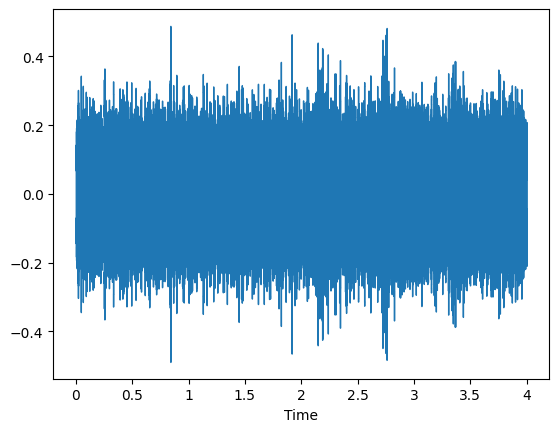

In [6]:
librosa_sample_rate
librosa.display.waveshow(librosa_audio_data,sr=librosa_sample_rate)
ipd.Audio(filename)

In [7]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(filename)

In [8]:
wave_audio
wave_sample_rate

44100

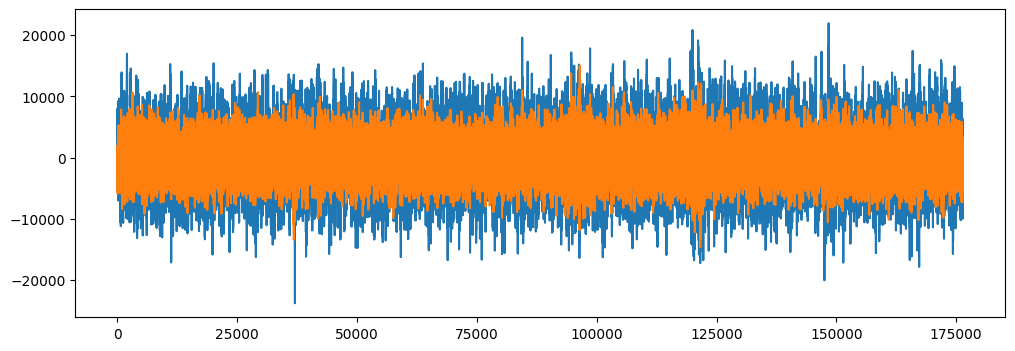

In [9]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)
plt.show()

In [10]:
metadata = pd.read_csv('/content/drive/MyDrive/Case Study_ESC/archive/UrbanSound8K.csv')
metadata.head()
metadata.shape

(8732, 8)

In [11]:
metadata.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [12]:
metadata.duplicated().sum()

0

In [13]:
#check whether the dataset is balanced/imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

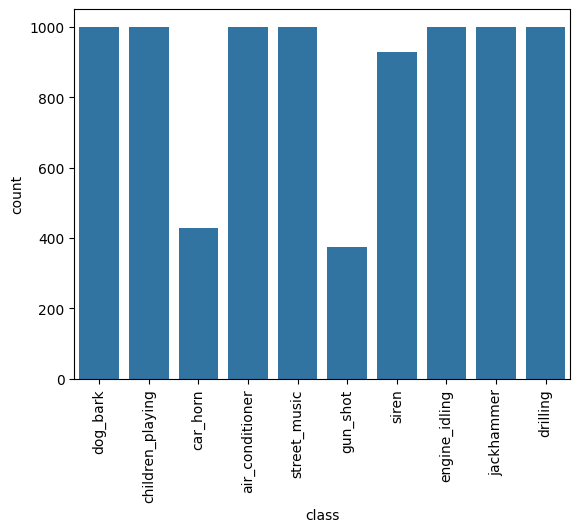

In [14]:
sns.countplot(x='class',data=metadata)
plt.xticks(rotation=90)
plt.show()

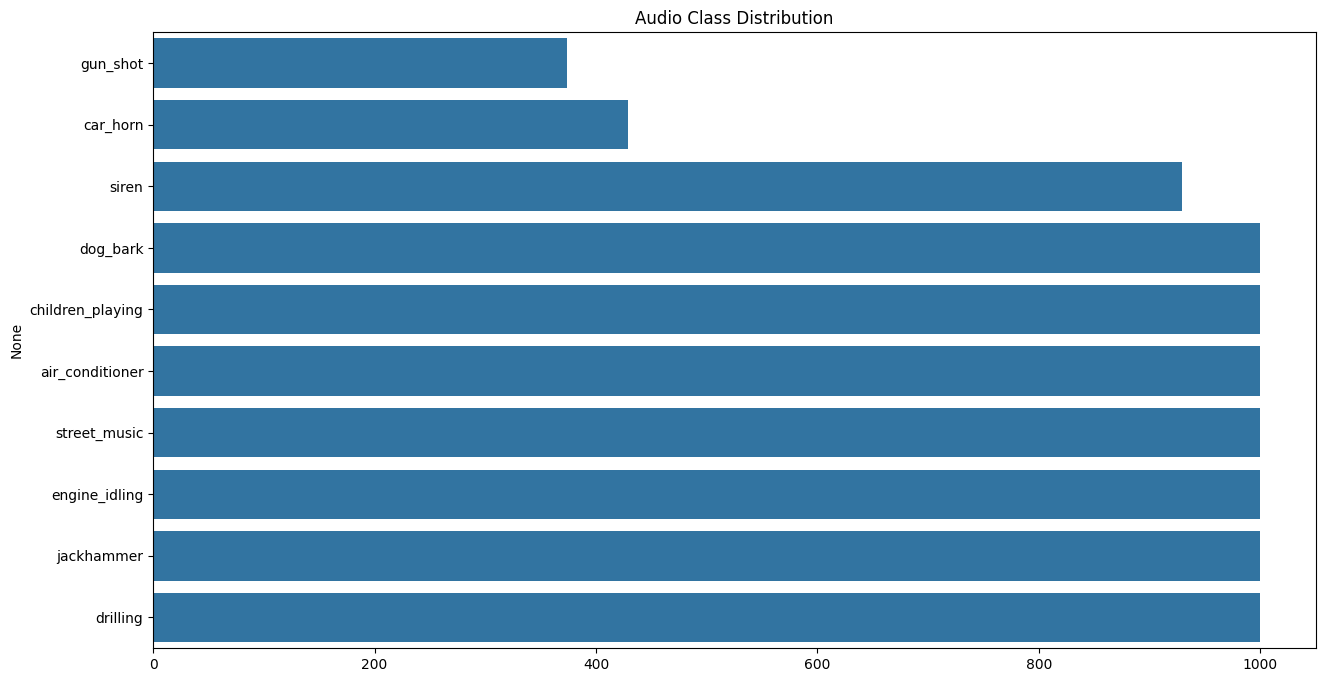

In [15]:
plt.figure(figsize=(15,8))
plt.title('Audio Class Distribution')
class_dist = metadata['class'].value_counts().sort_values()
sns.barplot(x=class_dist.values,
           y=class_dist.keys())
plt.show()

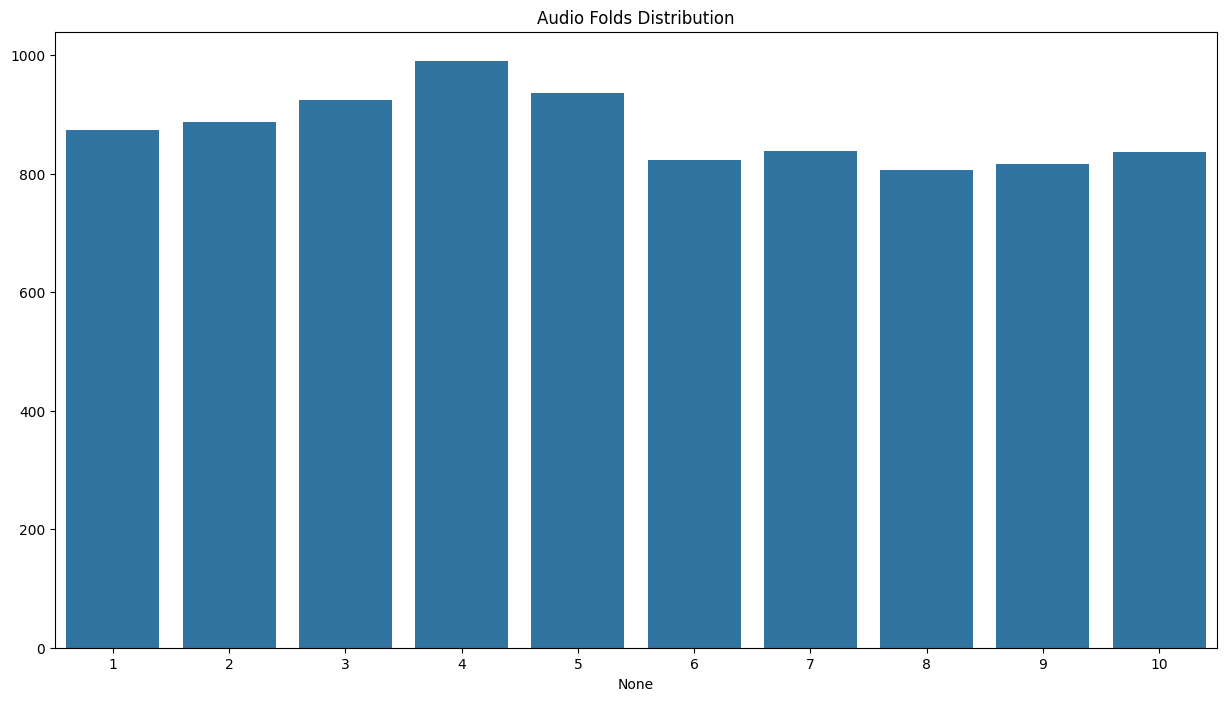

In [16]:
plt.figure(figsize=(15,8))
plt.title('Audio Folds Distribution')
folds_dist = metadata['fold'].value_counts().sort_values()
sns.barplot(y=folds_dist.values,
           x=folds_dist.keys())
plt.show()

In [17]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=50)
mfccs

array([[-91.285095  , -49.2785    , -47.054306  , ..., -50.906086  ,
        -52.75005   , -70.28833   ],
       [ 62.373394  ,  72.160446  ,  73.3779    , ...,  63.376286  ,
         65.38968   ,  64.63338   ],
       [-36.89119   , -27.808048  , -31.262882  , ..., -39.2567    ,
        -41.783714  , -40.556404  ],
       ...,
       [ -2.8631454 ,  -1.4999509 ,  -1.3144895 , ...,  -3.6289601 ,
         -3.2001166 ,  -0.9589349 ],
       [ -4.891677  ,  -5.237199  ,  -3.5814056 , ...,  -3.8117375 ,
         -7.0759697 ,  -4.9002466 ],
       [  2.809935  ,   1.1640427 ,  -0.33048457, ...,  -0.98981786,
         -3.7980115 ,  -3.7981095 ]], dtype=float32)

In [18]:
mfccs.shape

(50, 173)

In [19]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [20]:
audio_dataset_path='/content/drive/MyDrive/Case Study_ESC/archive'

In [21]:
import os
from tqdm import tqdm

In [22]:
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients

extracted_features = []

for i, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

8732it [39:04,  3.72it/s]


In [23]:
# Convert extracted features to DataFrame
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

In [24]:
# Feature Scaling (Normalization)
scaler = StandardScaler()
normalized_features = scaler.fit_transform(np.array(extracted_features_df['feature'].tolist()))

In [25]:
# Assign normalized features to DataFrame
extracted_features_df['feature'] = normalized_features.tolist()

In [26]:
#converting extracted features to pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.581215, -122.813156, -60.74529...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578075, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658787, 50.690285,...",children_playing


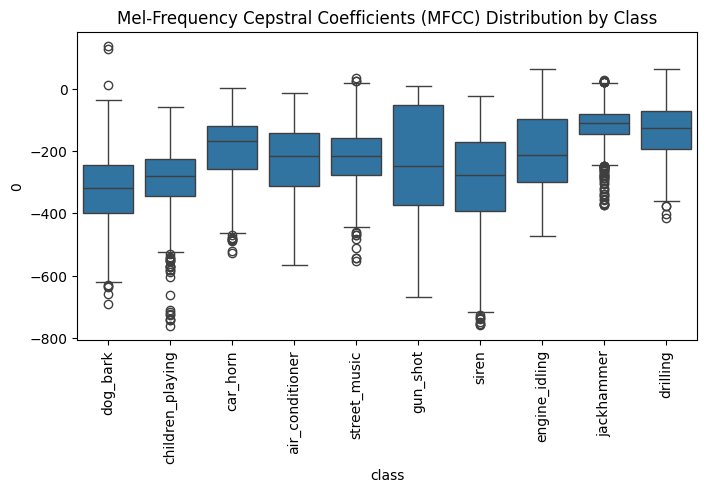

In [27]:
# Modified code to show dataset distribution as a boxplot
plt.figure(figsize=(8, 4))
plt.title('Mel-Frequency Cepstral Coefficients (MFCC) Distribution by Class')

# Convert the 'feature' column to a DataFrame
mfcc_df = pd.DataFrame(extracted_features_df['feature'].tolist())
mfcc_df['class'] = extracted_features_df['class']

# Use the DataFrame for the boxplot
sns.boxplot(x='class', y=mfcc_df.columns[0], data=mfcc_df)
plt.xticks(rotation=90)
plt.show()

In [28]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [30]:
X

array([[-2.11936981e+02,  6.25812149e+01, -1.22813156e+02, ...,
         1.23093772e+00, -5.30414248e+00,  2.22271156e+00],
       [-4.17005188e+02,  9.93366241e+01, -4.29955864e+01, ...,
         1.16269362e+00, -1.96495378e+00,  4.15635616e-01],
       [-4.52393158e+02,  1.12362534e+02, -3.75780754e+01, ...,
         6.01064444e-01, -2.65929937e+00,  7.46222198e-01],
       ...,
       [-2.97315338e+02,  1.02090263e+02, -3.67510796e+01, ...,
         2.20239830e+00,  1.95113873e+00, -3.40594918e-01],
       [-3.36923859e+02,  1.15313904e+02, -4.48470917e+01, ...,
         3.53287309e-01, -1.25762689e+00, -1.70473540e+00],
       [-3.07417633e+02,  8.33067245e+01, -2.57565117e+01, ...,
         4.89573479e+00, -4.30078888e+00, -7.42103004e+00]], dtype=float32)

In [31]:
X.shape

(8732, 50)

In [32]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [33]:
y.shape

(8732,)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [34]:
# Convert the class labels to one-hot encoding
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [35]:
labelencoder = LabelEncoder()
y_encoded = labelencoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [77]:
print(X_train.shape)

(6985, 50)


In [39]:
from skopt.space import Real, Integer, Categorical

In [42]:
from skopt import BayesSearchCV  # Add this line for the missing import

In [36]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.5 MB/s eta 0:00:00


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def create_model(filters, kernel_size, batch_size, activation, optimizer, dropout_rate):
    model = Sequential()

    # Layer 1: Conv1D
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', strides=2, input_shape=(X_train.shape[1], 1)))

    # Layer 2: MaxPool1D
    model.add(MaxPooling1D(pool_size=2, strides=2))

    # Layer 3: Conv1D
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', strides=2))

    # Layer 4: MaxPool1D
    model.add(MaxPooling1D(pool_size=2, strides=2))

    # Layer 5: Conv1D
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', strides=2))

    # Layer 6: Conv1D
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', strides=2))

    # Layer 7: Flatten
    model.add(Flatten())

    # Layer 8: Dense
    model.add(Dense(units=128, activation='relu'))

    # Layer 9: Dropout
    model.add(Dropout(rate=0.25))

    # Layer 10: Dense (Output)
    model.add(Dense(units=y.shape[1], activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model


In [84]:
# Define the search space for hyperparameters
param_space = {
    'filters': Integer(16, 512),
    'kernel_size': Integer(2, 12),
    'batch_size': Integer(16, 256),
    'activation': Categorical(['relu', 'linear', 'sigmoid', 'tanh']),
    'optimizer': Categorical(['adam', 'eag', 'rmsprop', 'nadam', 'adamax', 'adadelta', 'adagrad']),
    'dropout_rate': Real(0.0, 0.5)
}

In [85]:
# Wrapper class for the model
class KerasClassifierWrapper:
    def __init__(self, filters, kernel_size, batch_size, activation, optimizer, dropout_rate):
        self.filters = filters
        self.kernel_size = kernel_size
        self.batch_size = batch_size
        self.activation = activation
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.model = None  # Initialize the model attribute

    def fit(self, X, y):
        self.model = create_model(self.filters, self.kernel_size, self.batch_size, self.activation, self.optimizer, self.dropout_rate)
        self.model.fit(X, y, epochs=your_epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {
            'filters': self.filters,
            'kernel_size': self.kernel_size,
            'batch_size': self.batch_size,
            'activation': self.activation,
            'optimizer': self.optimizer,
            'dropout_rate': self.dropout_rate
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [86]:
# Set up Bayesian Optimization
# Set up Bayesian Optimization
opt = BayesSearchCV(
    KerasClassifierWrapper(filters=16, kernel_size=2, batch_size=16, activation='relu', optimizer='adam', dropout_rate=0.0),  # provide initial hyperparameter values
    param_space,
    n_iter=10,  # Set the number of iterations based on your computational resources
    cv=10,  # Specify the number of folds for cross-validation
    n_jobs=-1,
    scoring='accuracy',
    verbose=1,
    random_state=42
)

In [87]:
# Perform Bayesian Optimization
opt.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


ValueError: Exception encountered when calling layer "conv1d_3" (type Conv1D).

Negative dimension size caused by subtracting 2 from 1 for '{{node conv1d_3/Conv1D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 2, 1], use_cudnn_on_gpu=true](conv1d_3/Conv1D/ExpandDims, conv1d_3/Conv1D/ExpandDims_1)' with input shapes: [?,1,1,128], [1,2,128,128].

Call arguments received by layer "conv1d_3" (type Conv1D):
  • inputs=tf.Tensor(shape=(None, 1, 128), dtype=float32)

In [ ]:
# Get the best hyperparameters
best_params = opt.best_params_

In [ ]:
# Train the final model with the best hyperparameters
final_model = create_model(**best_params)
final_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=your_epochs, batch_size=best_params['batch_size'], validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val))


In [ ]:
# Evaluate the final model on your test set
y_pred = final_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(f'Test Accuracy: {test_accuracy}')